# CIFAR - 10
## Basic CNN

<img src="data/cifar10_plot.png"
     style="float: left; margin-right: 1px;" width="500" height="400" />

### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

Using TensorFlow backend.


Import helper functions

In [2]:
from helper import get_class_names, get_train_data, get_test_data, plot_images, plot_model

Change matplotlib graph style

In [3]:
matplotlib.style.use('ggplot')

### Constants

Import class names

In [4]:
class_names = get_class_names()
print(class_names)

Decoding file: data/batches.meta
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Get number of classes

In [5]:
num_classes = len(class_names)
print(num_classes)

10


In [6]:
# Hight and width of the images
IMAGE_SIZE = 32
# 3 channels, Red, Green and Blue
CHANNELS = 3

### Fetch and decode data

Load the training dataset. Labels are integers whereas class is one-hot encoded vectors.

In [7]:
images_train, labels_train, class_train = get_train_data()

Decoding file: data/data_batch_1
Decoding file: data/data_batch_2
Decoding file: data/data_batch_3
Decoding file: data/data_batch_4
Decoding file: data/data_batch_5


Normal labels

In [8]:
print(labels_train)

[6 9 9 ..., 9 1 1]


One hot encoded labels

In [9]:
print(class_train)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]]


Load the testing dataset.

In [10]:
images_test, labels_test, class_test = get_test_data()

Decoding file: data/test_batch


In [11]:
print("Training set size:\t",len(images_train))
print("Testing set size:\t",len(images_test))

Training set size:	 50000
Testing set size:	 10000


The CIFAR-10 dataset has been loaded and consists of a total of 60,000 images and corresponding labels.

### Define the CNN model

In [12]:
def cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))    
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    
    return model

Build model

In [13]:
model = cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

### Train model on the training data

Save the model after every epoch

In [14]:
checkpoint = ModelCheckpoint('best_model_simple.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor 

Configure the model for training

In [15]:
model.compile(loss='categorical_crossentropy', # Better loss function for neural networks
              optimizer=Adam(lr=1.0e-4), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) # Metrics to be evaluated by the model

For more information on categorical cross entropy loss function see - https://jamesmccaffrey.wordpress.com/2013/11/05/why-you-should-use-cross-entropy-error-instead-of-classification-error-or-mean-squared-error-for-neural-network-classifier-training/

Fit the model on the data provided

In [ ]:
NUM_EPOCH = 100
# NUM_EPOCH = 10

In [16]:
model_details = model.fit(images_train, class_train,
                    batch_size = 128, # number of samples per gradient update
                    epochs = NUM_EPOCH, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s - loss: 1.9317 - acc: 0.2905 - val_loss: 1.6463 - val_acc: 0.4134
Epoch 2/100
50000/50000 [==============================] - 13s - loss: 1.6038 - acc: 0.4149 - val_loss: 1.4637 - val_acc: 0.4684
Epoch 3/100
50000/50000 [==============================] - 13s - loss: 1.4733 - acc: 0.4644 - val_loss: 1.3584 - val_acc: 0.5114
Epoch 4/100
50000/50000 [==============================] - 13s - loss: 1.3971 - acc: 0.4946 - val_loss: 1.2999 - val_acc: 0.5330
Epoch 5/100
50000/50000 [==============================] - 13s - loss: 1.3391 - acc: 0.5161 - val_loss: 1.2545 - val_acc: 0.5556
Epoch 6/100
50000/50000 [==============================] - 13s - loss: 1.2885 - acc: 0.5374 - val_loss: 1.2071 - val_acc: 0.5749
Epoch 7/100
50000/50000 [==============================] - 13s - loss: 1.2474 - acc: 0.5559 - val_loss: 1.1810 - val_acc: 0.5798
Epoch 8/100
50000/50000 [======================

### Evaluate the model

In [18]:
scores = model.evaluate(images_test, class_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 79.09%


### Model accuracy and loss plots

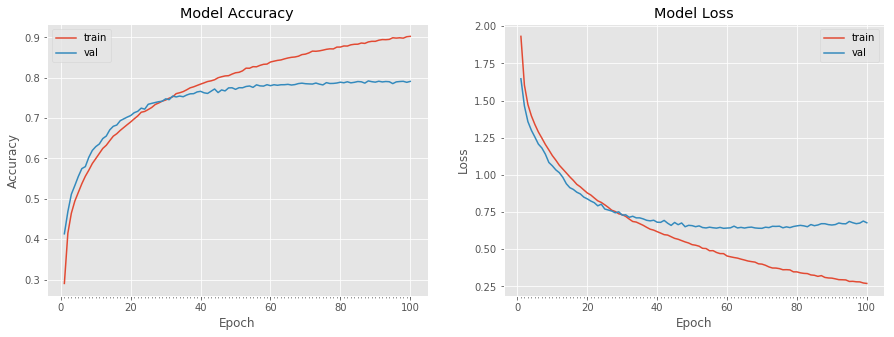

In [19]:
plot_model(model_details)

### Predictions

Predict class for test set images

In [20]:
class_pred = model.predict(images_test, batch_size=32)
print(class_pred[0])

[  1.80459465e-04   8.32395803e-04   1.04784616e-04   9.50568378e-01
   5.09474521e-05   4.66815569e-02   4.18954842e-05   1.13809959e-03
   3.03631765e-04   9.78875541e-05]


Get the index of the largest element in each vector

In [21]:
labels_pred = np.argmax(class_pred,axis=1)
print(labels_pred)
print()
print(class_names)

[3 1 8 ..., 5 1 7]

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Check which labels have been predicted correctly

In [22]:
correct = (labels_pred == labels_test)
print(correct)
print("Number of correct predictions: %d" % sum(correct))

[ True False  True ...,  True  True  True]
Number of correct predictions: 7909


Calculate accuracy using manual calculation

In [23]:
num_images = len(correct)
print("Accuracy: %.2f%%" % ((sum(correct)*100)/num_images))

Accuracy: 79.09%


### Show some correct classifications

Get the correctly classified images

In [24]:
img_correct = (correct == True)

# Images of the test-set that have been incorrectly classified.
images_correct = images_test[img_correct]

# Get predicted classes for those images
labels_correct = labels_pred[img_correct]

# Get true classes for those images
labels_true = labels_test[img_correct]

Plot the first 9 correctly classified images

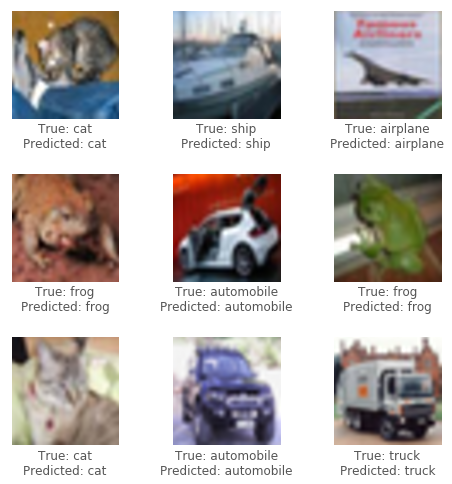

In [25]:
plot_images(images=images_correct[0:9],
            labels_true=labels_true[0:9],
            class_names=class_names,
            labels_pred=labels_correct[0:9])

### Show some mis-classifications

Get the incorrectly classified images

In [26]:
incorrect = (correct == False)

# Images of the test-set that have been incorrectly classified.
images_error = images_test[incorrect]

# Get predicted classes for those images
labels_error = labels_pred[incorrect]

# Get true classes for those images
labels_true = labels_test[incorrect]

Plot the first 9 mis-classified images

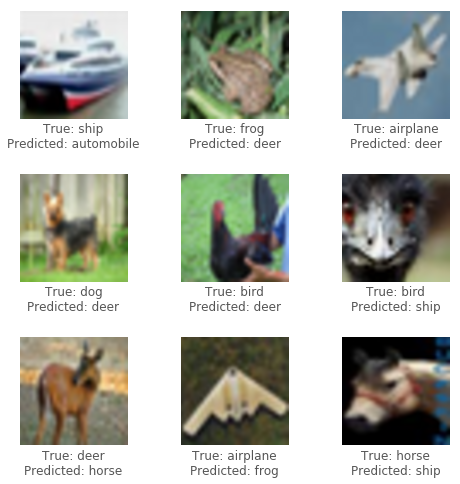

In [27]:
plot_images(images=images_error[0:9],
            labels_true=labels_true[0:9],
            class_names=class_names,
            labels_pred=labels_error[0:9])

## Credits

 - https://www.cs.toronto.edu/~kriz/cifar.html
 - https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py
 - https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/06_CIFAR-10.ipynb
 - http://machinelearningmastery.com/object-recognition-convolutional-neural-networks-keras-deep-learning-library/
 - https://parneetk.github.io/blog/cnn-cifar10/
 - https://github.com/dnlcrl/deep-residual-networks-pyfunt/blob/master/docs/CIFAR-10%20Experiments.ipynb